In [24]:
# importing required libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')  # Consistent visual style

In [25]:
# loading the dataset and verifying it loaded correctly
try:
    # Load the dataset using correct delimiter (semicolon)
    df_raw = pd.read_csv("student-mat.csv", sep= ';')
    df_raw.columns = df_raw.columns.str.strip()  # for visualizations
    print("✅ Data loaded successfully. Shape:", df_raw.shape)
except FileNotFoundError:
    print("❌ File not found. Please check the file path.")

✅ Data loaded successfully. Shape: (395, 33)


In [26]:
print(df_raw.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [27]:
df_raw.info()  # Check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [28]:
df_raw.head()  # Preview first few rows to check structure

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [29]:
# Define a function to clean the dataset
def clean_data(df):
    """Removes null values and duplicate rows from the DataFrame."""
    df = df_raw.dropna()
    df = df_raw.drop_duplicates()
    return df

# Apply the cleaning function
df = clean_data(df_raw)

In [30]:
# Convert categorical columns into numeric using one-hot encoding
def encode_categoricals(df_raw):
    """Encodes all object-type columns using one-hot encoding."""
    return pd.get_dummies(df, drop_first=True)

df = encode_categoricals(df_raw)

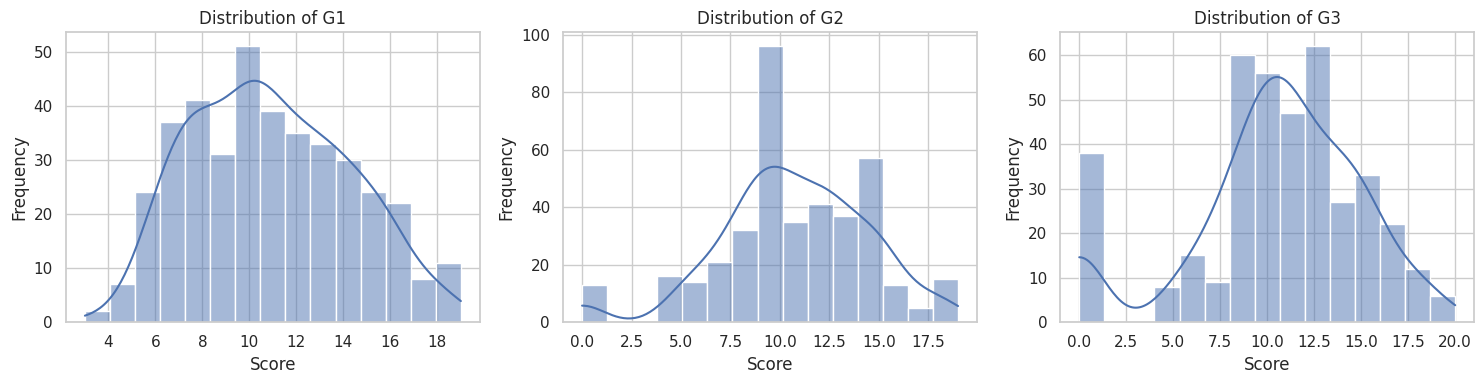

In [31]:
# Plot histograms for G1, G2, and G3 side by side
plt.figure(figsize=(15, 4))

for i, grade_col in enumerate(['G1', 'G2', 'G3'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_raw[grade_col], kde=True, bins=15)
    plt.title(f"Distribution of {grade_col}")
    plt.xlabel("Score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

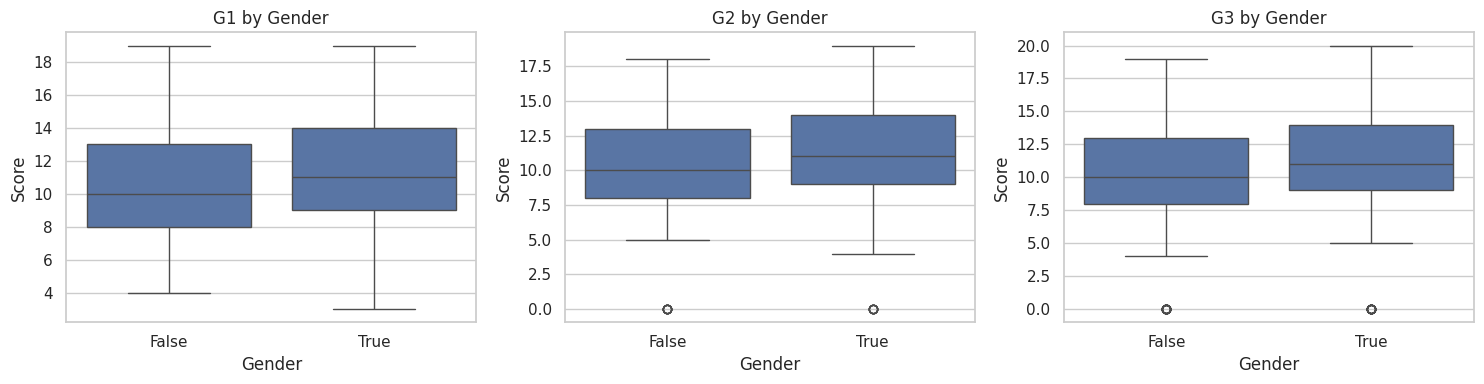

In [32]:
# Plot boxplots for G1, G2, G3 vs Gender
plt.figure(figsize=(15, 4))

for i, grade_col in enumerate(['G1', 'G2', 'G3'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='sex_M', y=grade_col, data=df)
    plt.title(f"{grade_col} by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

/tmp/ipython-input-33-2148630256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='schoolsup', data=df_raw, palette='pastel')


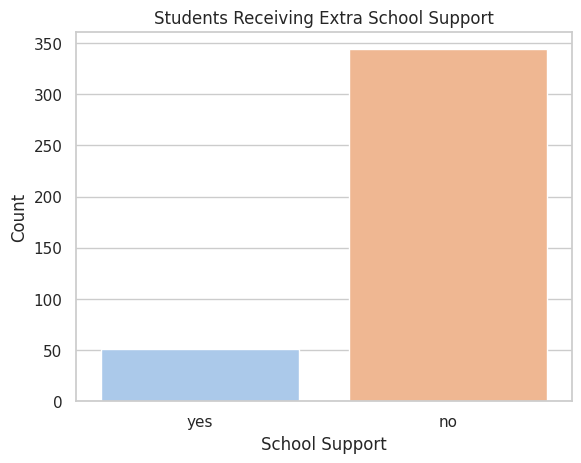

In [33]:
# Countplot of school support (educational test prep)
sns.countplot(x='schoolsup', data=df_raw, palette='pastel')
plt.title("Students Receiving Extra School Support")
plt.xlabel("School Support")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-34-3462226227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medu', y='G3', data=df_raw, estimator=np.mean, palette='Blues')


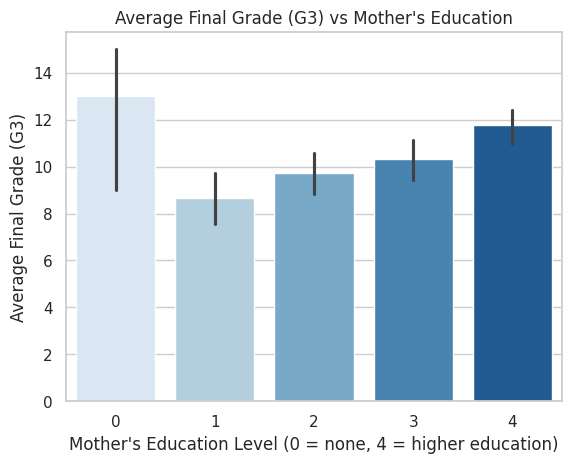

In [34]:
# Barplot of average G3 score grouped by mother's education level
sns.barplot(x='Medu', y='G3', data=df_raw, estimator=np.mean, palette='Blues')

plt.title("Average Final Grade (G3) vs Mother's Education")
plt.xlabel("Mother's Education Level (0 = none, 4 = higher education)")
plt.ylabel("Average Final Grade (G3)")
plt.show()

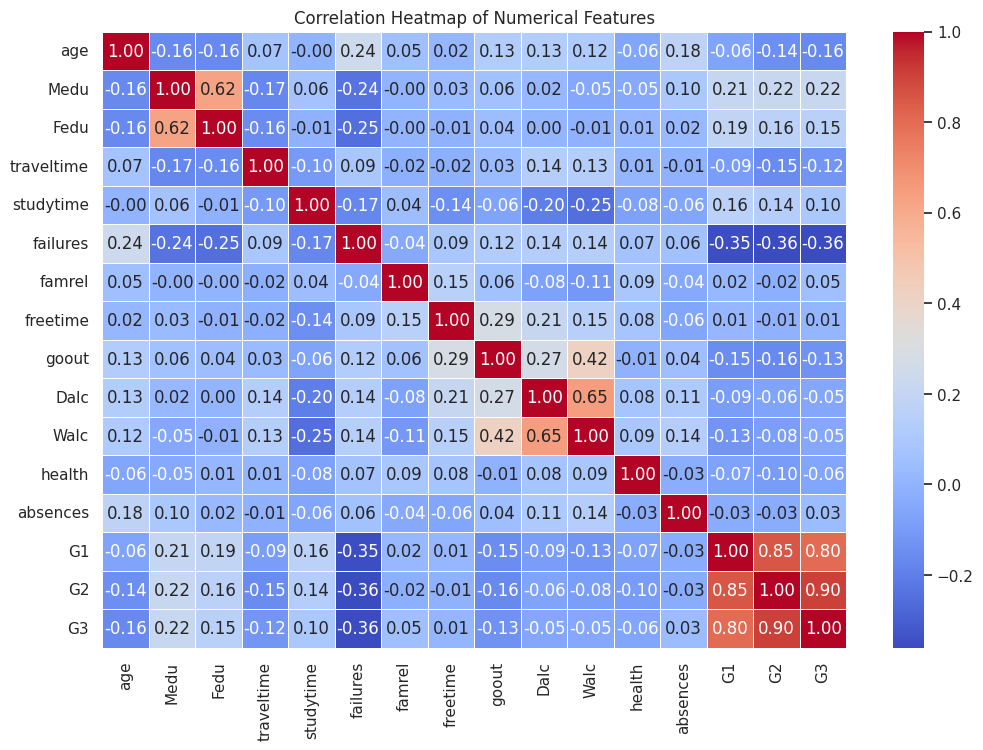

In [35]:
# Compute correlation matrix of numerical columns
corr_matrix = df_raw.corr(numeric_only=True)
#corr_matrix['G3'].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

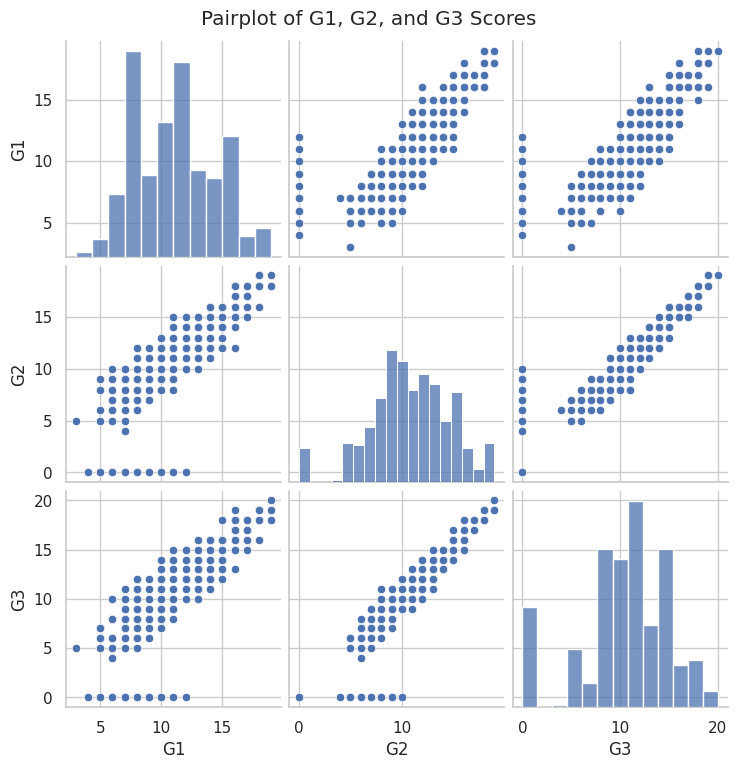

In [36]:
# Plot pairwise relationships between G1, G2, and G3
sns.pairplot(df_raw[['G1', 'G2', 'G3']])
plt.suptitle("Pairplot of G1, G2, and G3 Scores", y=1.02)
plt.show()

/tmp/ipython-input-37-341098994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='G1', data=df_raw, palette='Set3')


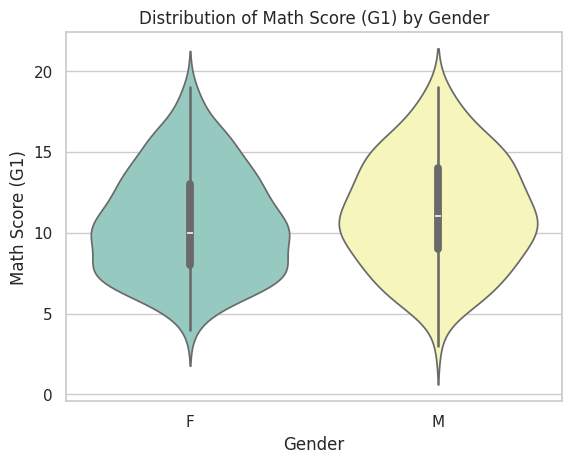

In [37]:
# Violin plot of math score (G1) vs gender
sns.violinplot(x='sex', y='G1', data=df_raw, palette='Set3')
plt.title("Distribution of Math Score (G1) by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score (G1)")
plt.show()

In [38]:
# Add a binary pass/fail column based on final grade
df_raw['pass_fail'] = df_raw['G3'].apply(lambda g: 'Pass' if g >= 10 else 'Fail')
print(df_raw['pass_fail'])

0      Fail
1      Fail
2      Pass
3      Pass
4      Pass
       ... 
390    Fail
391    Pass
392    Fail
393    Pass
394    Fail
Name: pass_fail, Length: 395, dtype: object


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Make a copy to work on
df_ml = df_raw.copy()

# Encode target column
label_encoder = LabelEncoder()
df_ml['pass_fail'] = label_encoder.fit_transform(df_ml['pass_fail'])  # Pass = 1, Fail = 0

# Select features for the model (you can customize)
features = ['age', 'sex', 'studytime', 'failures', 'absences', 'goout', 'schoolsup']
X = df_ml[features]
y = df_ml['pass_fail']

# Encode categorical features (e.g., sex, schoolsup)
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7468354430379747

Confusion Matrix:
 [[10 17]
 [ 3 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.37      0.50        27
           1       0.74      0.94      0.83        52

    accuracy                           0.75        79
   macro avg       0.76      0.66      0.67        79
weighted avg       0.75      0.75      0.72        79



In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dtree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.6835443037974683

Confusion Matrix:
 [[13 14]
 [11 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51        27
           1       0.75      0.79      0.77        52

    accuracy                           0.68        79
   macro avg       0.64      0.63      0.64        79
weighted avg       0.68      0.68      0.68        79

